In [415]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import zipcodes as zcode
import numpy as np

In [416]:
df = pd.read_csv('Loan_Modelling.csv')#importing the data set

In [417]:
df.head()  #checking the head of the data 

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [419]:
df.describe()  #see personal loan is having 9.6 percent only which means -biased data(one type of data is more )

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [420]:
sns.pairplot(df)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000023ED6520C10> (for post_execute):


KeyboardInterrupt: 

1.To find out the Potential Customer 
2.Which Variables / features are more significant 
3.which segment of customers should be targeted more 

In [155]:
df.drop('ID',axis = 1, inplace = True) #removing id colummn

In [421]:
df.sample(5) #any 5 data #random sampling of data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2733,2734,55,29,72,93107,3,0.3,2,147,0,0,0,0,0
3965,3966,39,15,94,91941,2,1.9,1,0,0,0,0,1,0
2897,2898,28,2,34,92161,4,1.3,3,0,0,0,0,0,0
1379,1380,62,37,162,95051,1,1.3,1,0,0,0,0,1,0
3867,3868,44,19,61,94080,3,2.7,2,0,0,0,0,0,0


In [157]:
print('Number of unique  values:\n------------------\n ',df.nunique(),sep = '') #separated by 'space'

Number of unique  values:
------------------
 Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal_Loan           2
Securities_Account      2
CD_Account              2
Online                  2
CreditCard              2
dtype: int64


In [158]:
#isme those which have less number of unique data are categorical data

In [159]:
cat_cols = ['Family','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']

In [411]:
print('Unique Data for all-------------\n') #printing all the unique data-- present in each feature 
for c in df.columns:
    print(c,df[c].unique(),'',sep='\n-----------\n')

Unique Data for all-------------

ID
-----------
[   1    2    3 ... 4998 4999 5000]
-----------

Age
-----------
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
-----------

Experience
-----------
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
-----------

Income
-----------
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182 

In [422]:
cat_cols = ['Family','Education','Securities_Account','CD_Account','Online','CreditCard','Personal_Loan']
cont_cols = ['Age','Experience','Income','CCAvg','Mortgage']

PREPROCESSING

In [413]:
# viewing the negative experience values
df[df['Experience']<0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [163]:
df[df['Experience']<0].groupby(['Age','Education'])['Experience'].describe()

count      mean       std  min   25%  50%  75%  max
Age Education                                                     
23  1            7.0 -1.285714  0.755929 -3.0 -1.00 -1.0 -1.0 -1.0
    2            5.0 -2.200000  0.447214 -3.0 -2.00 -2.0 -2.0 -2.0
24  1            5.0 -1.800000  0.447214 -2.0 -2.00 -2.0 -2.0 -1.0
    2            6.0 -1.166667  0.408248 -2.0 -1.00 -1.0 -1.0 -1.0
    3            6.0 -2.333333  0.516398 -3.0 -2.75 -2.0 -2.0 -2.0
25  1            4.0 -1.000000  0.000000 -1.0 -1.00 -1.0 -1.0 -1.0
    2            4.0 -1.000000  0.000000 -1.0 -1.00 -1.0 -1.0 -1.0
    3           10.0 -1.100000  0.316228 -2.0 -1.00 -1.0 -1.0 -1.0
26  2            1.0 -1.000000       NaN -1.0 -1.00 -1.0 -1.0 -1.0
28  3            1.0 -2.000000       NaN -2.0 -2.00 -2.0 -2.0 -2.0
29  3            3.0 -1.000000  0.000000 -1.0 -1.00 -1.0 -1.0 -1.0

In [423]:
df[df['Experience']<0].groupby(['Age','Education'])['Experience'].count()

Age  Education
23   1             7
     2             5
24   1             5
     2             6
     3             6
25   1             4
     2             4
     3            10
26   2             1
28   3             1
29   3             3
Name: Experience, dtype: int64

In [165]:
#expperience can't be negative --data is entered wrongly aisa bol sakte hai 
#so either remove it or |Mod|
df['Experience'] = df['Experience'].apply(lambda x : np.abs(x) if x<0 else x)

In [166]:
a = -2

In [167]:
np.abs(a)

2

In [168]:
!pip install zipcodes

In [169]:
#try matching -- 

In [424]:

zcode.matching('92691')

[{'zip_code': '92691',
  'zip_code_type': 'STANDARD',
  'active': True,
  'city': 'Mission Viejo',
  'acceptable_cities': ['San Juan Capistrano', 'San Juan Capo'],
  'unacceptable_cities': [],
  'state': 'CA',
  'county': 'Orange County',
  'timezone': 'America/Los_Angeles',
  'area_codes': ['714', '949'],
  'world_region': 'NA',
  'country': 'US',
  'lat': '33.6042',
  'long': '-117.6677'}]

In [425]:
zcode.matching('90065')

[{'zip_code': '90065',
  'zip_code_type': 'STANDARD',
  'active': True,
  'city': 'Los Angeles',
  'acceptable_cities': ['Glassell', 'Glassell Park'],
  'unacceptable_cities': [],
  'state': 'CA',
  'county': 'Los Angeles County',
  'timezone': 'America/Los_Angeles',
  'area_codes': ['323'],
  'world_region': 'NA',
  'country': 'US',
  'lat': '34.1115',
  'long': '-118.2286'}]

In [172]:
zpcode.matching('90065')[0].get('county')

'Los Angeles County'

In [426]:
df['County'] = df['ZIPCode'].apply(lambda x: zcode.matching(str(x))[0].get('county') if len(zcode.matching(str(x))) else str(x))

In [427]:
df['County'].nunique()

42

In [428]:
df.sample(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County
1189,1190,42,17,115,92717,2,0.4,1,0,0,0,0,1,0,92717
691,692,45,18,48,90025,3,2.5,2,113,0,0,0,1,1,Los Angeles County
2583,2584,37,11,71,91302,1,2.5,1,185,0,0,0,1,1,Los Angeles County
1035,1036,43,17,81,94720,4,2.6,3,0,0,1,0,1,0,Alameda County
2853,2854,28,3,54,94550,4,0.6,2,0,0,0,0,1,0,Alameda County


# EDA(Exploratory Data Analysis) to find the percentage of data in each columns 

In [429]:
#to find how many categoricall data hai 
for col in cat_cols:
    print('Feature:',col)
    print(df[col].value_counts().sort_index())
    print()
    print('#'*20)
    print()

Feature: Family
1    1472
2    1296
3    1010
4    1222
Name: Family, dtype: int64

####################

Feature: Education
1    2096
2    1403
3    1501
Name: Education, dtype: int64

####################

Feature: Securities_Account
0    4478
1     522
Name: Securities_Account, dtype: int64

####################

Feature: CD_Account
0    4698
1     302
Name: CD_Account, dtype: int64

####################

Feature: Online
0    2016
1    2984
Name: Online, dtype: int64

####################

Feature: CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64

####################

Feature: Personal_Loan
0    4520
1     480
Name: Personal_Loan, dtype: int64

####################



In [177]:
#to find how many categoricall data hai 
for col in cat_cols:
    print('Feature:',col)
    print(df[col].value_counts().sort_index())
    print()
    print('#'*20)
    print()

Feature: Family
1    1472
2    1296
3    1010
4    1222
Name: Family, dtype: int64

####################

Feature: Education
1    2096
2    1403
3    1501
Name: Education, dtype: int64

####################

Feature: Securities_Account
0    4478
1     522
Name: Securities_Account, dtype: int64

####################

Feature: CD_Account
0    4698
1     302
Name: CD_Account, dtype: int64

####################

Feature: Online
0    2016
1    2984
Name: Online, dtype: int64

####################

Feature: CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64

####################

Feature: Personal_Loan
0    4520
1     480
Name: Personal_Loan, dtype: int64

####################



In [430]:
#personal loan is biased  jese ki 4520 logo ne nhi liya jabki sirf 480 logo ne liya
print(round(df['Personal_Loan'].value_counts()/len(df)*100,2)) #0 wale 90.4 percent jabki 1 wale ka 9.6 percent 

0    90.4
1     9.6
Name: Personal_Loan, dtype: float64


In [431]:
import seaborn as sns

In [179]:
#abhi iska hi graphical view dekhte hai 

In [432]:
def plot_pie_count(col, r,c,n):
    plt.subplot(r,c,n)
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.subplot(r,c,n+1)
    sns.countplot(x=col, data=df, hue='Personal_Loan')
   

In [181]:
import seaborn as sns

In [433]:
len(cat_cols)

7

In [434]:
cat_cols

['Family',
 'Education',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard',
 'Personal_Loan']

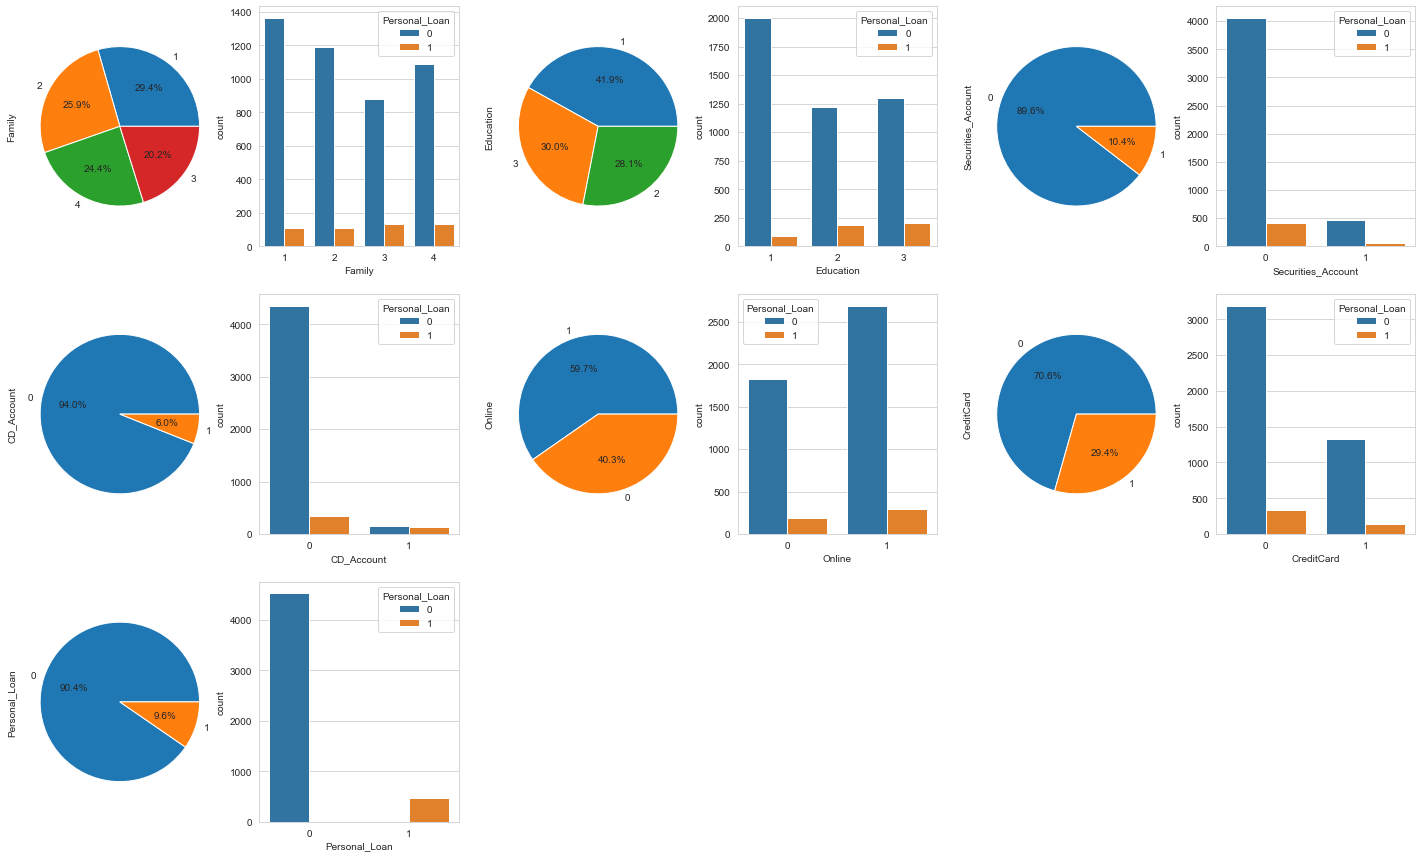

In [435]:
#ab ye data dalenge idhar hum -- figure banayenge - for loop chalate hai 
plt.figure(figsize=(25,15))
for i,c in enumerate(cat_cols):
    plot_pie_count(c,3,6,(i*2)+1)
 

In [185]:
import sys 
sys.version


'3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]'

# Acha yahan se na 16th july ka part start hogya thik hai

In [195]:
def plot_dist(col):
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().tolist()[0]
    plt.axvline(mean,color = 'r',linestyle = '--',linewidth = 2)
    plt.axvline(median,color = 'b',linestyle = '-',linewidth = 2)
    plt.axvline(mode,color = 'g',linestyle = '-.',linewidth = 2)
    sns.distplot(df[col], bins = 20, color = 'orange')
    
    plt.legend({'Mean %.1f'%mean:mean, 'Median %.1f'%median:median, 'Mode %.1f'%mode : mode})
    plt.title(col)
    
      

In [196]:
cont_cols

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

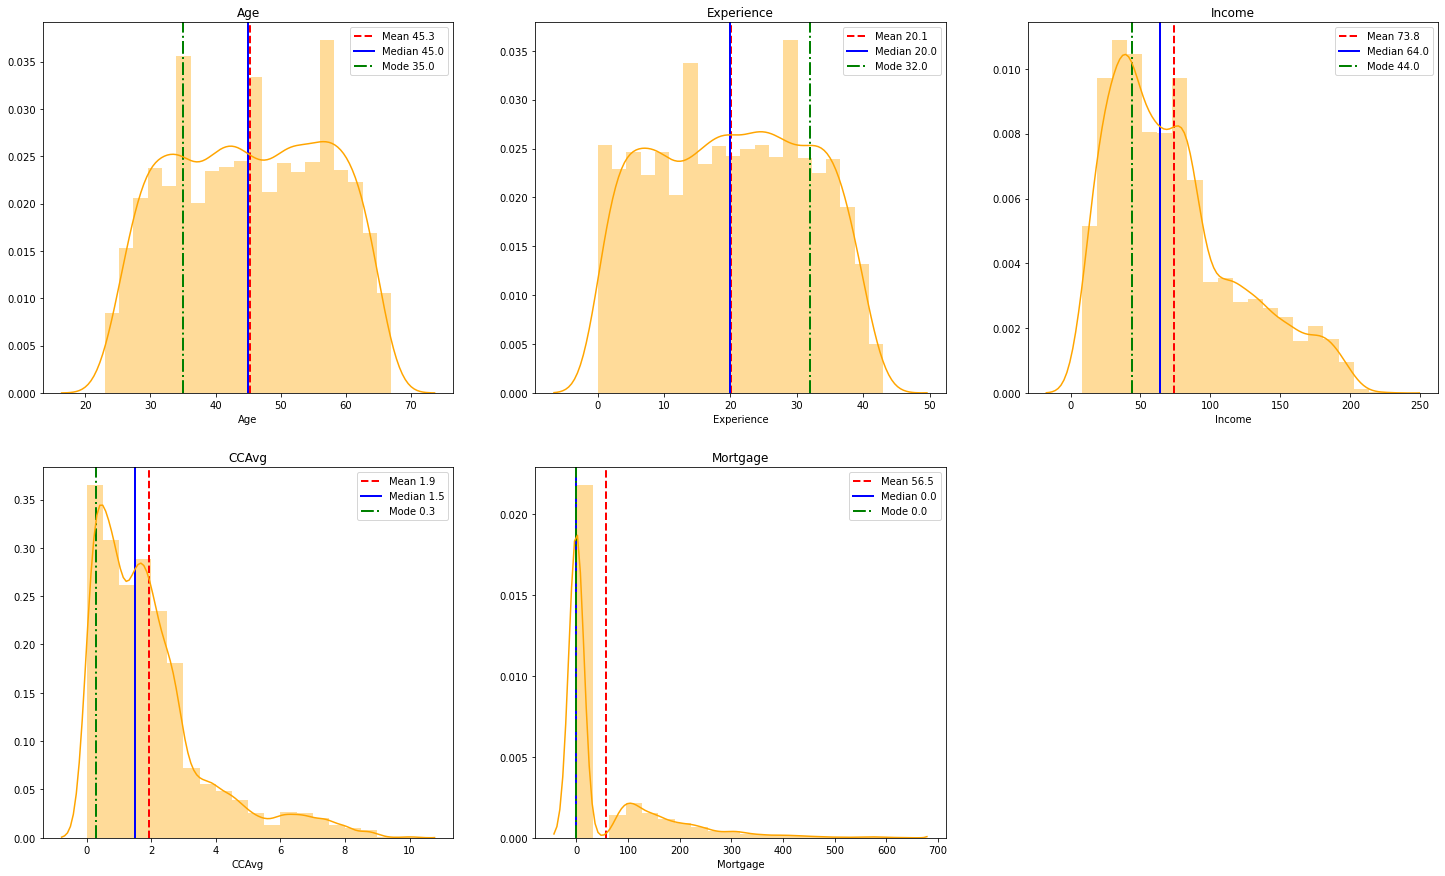

In [197]:
plt.figure(figsize = (25,15))
for i,c in enumerate(cont_cols):
    plt.subplot(2,3,i+1)
    plot_dist(c)

In [438]:
def plot_dist(col,r,c,p):
    clr = ['orange','blue']
    for i in range(2):
        plt.subplot(r,c,p+i)
        mean = df[col][df['Personal_Loan']==i].mean()
        median = df[col][df['Personal_Loan']==i].median()
        mode = df[col][df['Personal_Loan']==i].mode().tolist()[0]
        plt.axvline(mean, color='r', linestyle='--', linewidth=2)
        plt.axvline(median, color='b', linestyle='-', linewidth=2)
        plt.axvline(mode, color='g', linestyle='-.', linewidth=2)
        sns.distplot(df[col][df['Personal_Loan']==i], bins=20, color=clr[i])
        plt.legend({'Mean %.1f'%mean:mean, 'Median %.1f'%median : median, 'Mode %.1f'%mode : mode})
        plt.title(col+' & Personal Loan ={}'.format(i))

In [439]:
cont_cols

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

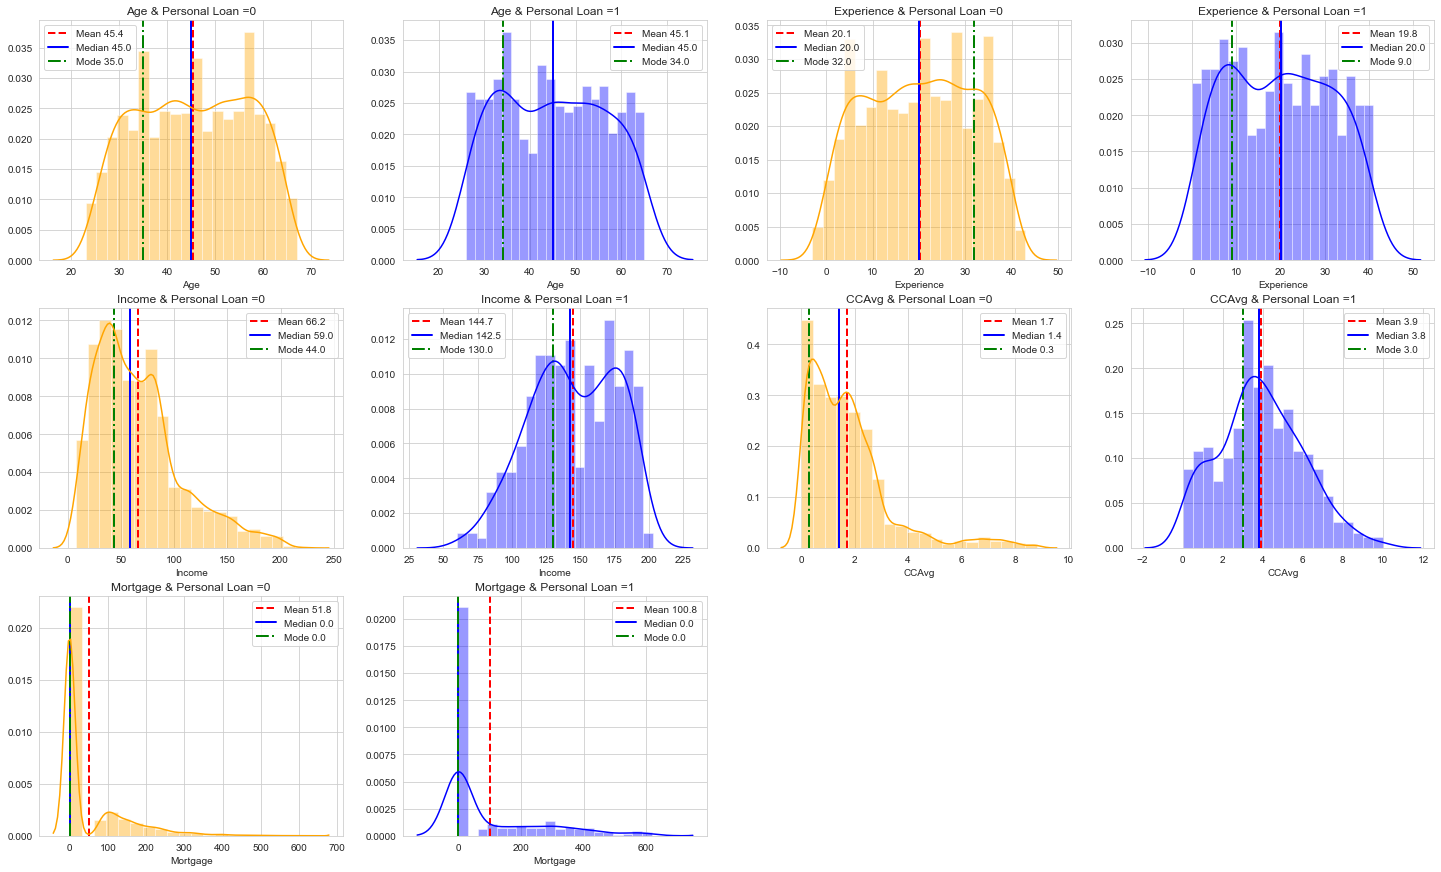

In [440]:
plt.figure(figsize=(25,15))
for i,c in enumerate(cont_cols):    
    plot_dist(c,3,4,(i*2)+1)

In [231]:
#experience jo age ke sath correlated hai matlb independent nhi hai , so we won't consider it 
#we can see from graph that those who have high income are taking loan 
#or mortgage pe jo hai wo bhi loan liye hai 
#family walo se bhi jyada le rahe hai 
#credit card people are also the same , those who have more credit cards are taking loan 

In [441]:
df['County'] = df['County'].apply(lambda x:x.replace(' County',''))

In [234]:
#plt.figure(figsize=(15,25))
pd.crosstab(index = df['County'], columns = df['Personal_Loan'].sort_values(ascending=False))

Personal_Loan,0,1
County,,
92634,5,0
92717,19,3
93077,1,0
96651,6,0
Alameda County,456,44
Butte County,17,2
Contra Costa County,73,12
El Dorado County,16,1
Fresno County,24,2


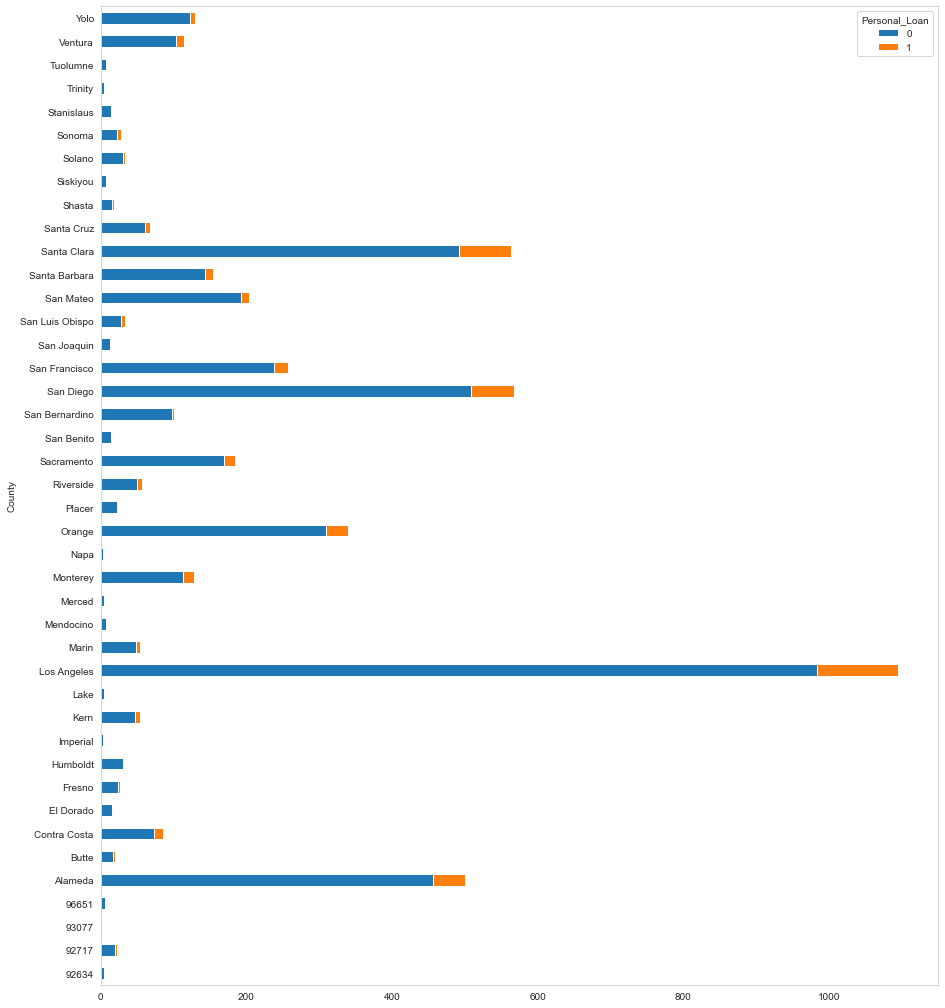

In [442]:
pd.crosstab(index=df['County'], columns=df['Personal_Loan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(15,18))
plt.grid()


In [240]:
df['County'] = df['County'].apply(lambda x:x.replace('County',''))

In [443]:
c200 = df['County'].value_counts().index[df['County'].value_counts()>200]
c200

Index(['Los Angeles', 'San Diego', 'Santa Clara', 'Alameda', 'Orange',
       'San Francisco', 'San Mateo'],
      dtype='object')

In [444]:
df['CountyGroup'] = df['County'].apply(lambda x: x if x in c200 else 'Other')

In [254]:
df['County'].value_counts().index[df['County'].value_counts()>200]

Index(['Los Angeles ', 'San Diego ', 'Santa Clara ', 'Alameda ', 'Orange ',
       'San Francisco ', 'San Mateo '],
      dtype='object')

In [255]:
c200 = df['County'].value_counts().index[df['County'].value_counts()>200]
c200

Index(['Los Angeles ', 'San Diego ', 'Santa Clara ', 'Alameda ', 'Orange ',
       'San Francisco ', 'San Mateo '],
      dtype='object')

In [257]:
df['CountyGroup'] = df['County'].apply(lambda x: x if x in c200 else 'other')

In [445]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,County,CountyGroup
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Los Angeles,Los Angeles
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Los Angeles,Los Angeles
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Alameda,Alameda
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,San Francisco,San Francisco
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Los Angeles,Los Angeles


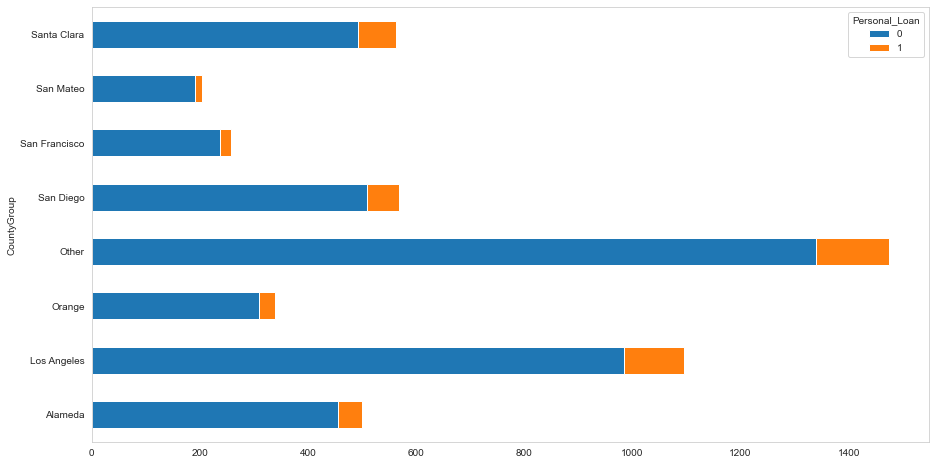

In [446]:
pd.crosstab(index=df['CountyGroup'], columns=df['Personal_Loan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(15,8))
plt.grid()

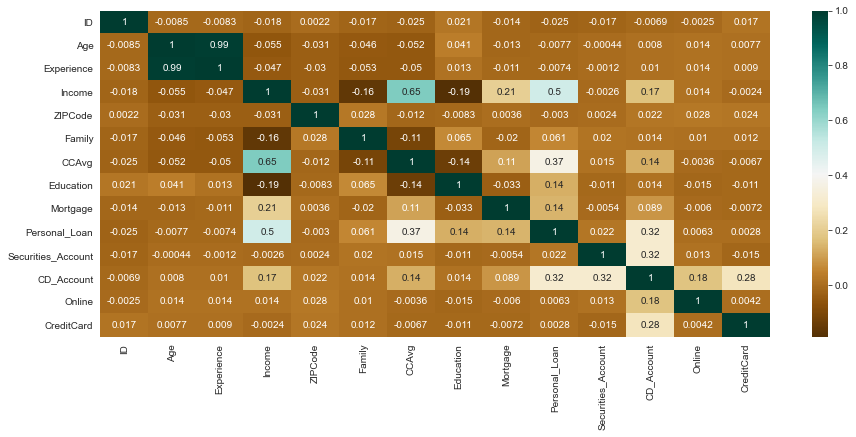

In [447]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap='BrBG',annot=True)

In [264]:
#age and experience have too high corr so leaving one , we will leave experience
#income is quite related with personal loan 
#family is having less correlation 
#cc avg is very much related with personal loan
#education is also having a bit impact
#mortgage to have an impact
#cd account is having also impact 
#we have done it manually 

# outliers --- some values which are just out of the range of min and max or iqr 
we have to detect and remove it 

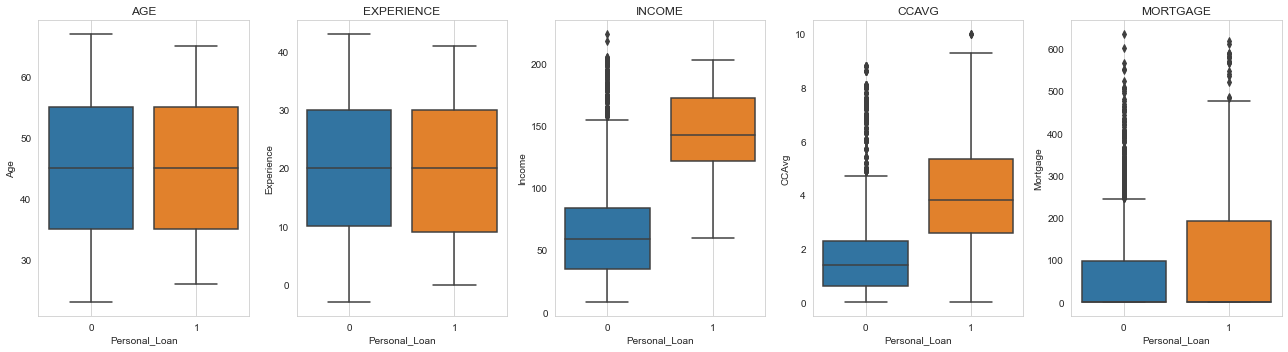

In [448]:
plt.figure(figsize=(18,5))
for i,c in enumerate(cont_cols):
    plt.subplot(1,5,i+1)
    sns.boxplot(x='Personal_Loan',y=c, data=df)
#     plt.boxplot(df[c],whis=1.5)
    plt.tight_layout()
    plt.title(c.upper())
    plt.grid()

In [449]:

income = df['Income'].copy()

In [450]:
import warnings
warnings.filterwarnings('ignore')

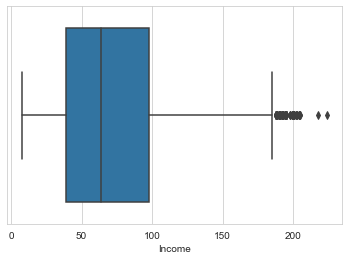

In [451]:
sns.boxplot(income)

In [452]:
Q1 = income.quantile(0.25)
Q3 = income.quantile(0.75)
IQR = Q3-Q1
print('IQR is:',IQR)

IQR is: 59.0


In [453]:
Q1

39.0

In [454]:
first_q = Q1-1.5*IQR
third_q = Q3+1.5*IQR
print(first_q)
print(third_q)

-49.5
186.5


In [455]:
income1 = income[(income<=third_q)&(income>=first_q)]

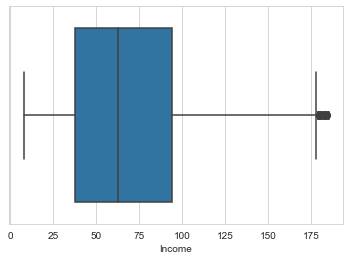

In [456]:
sns.boxplot(income1)

In [457]:

sum((income<=third_q)&(income>=first_q))


4904

In [288]:
#can be removed or be kept 

# Prepare the data for Training 

In [458]:
df.columns


Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'County', 'CountyGroup'],
      dtype='object')

In [459]:
x = df[['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities_Account','CD_Account','Online','CreditCard']]
y = df['Personal_Loan']

In [460]:
from sklearn.model_selection import train_test_split

In [461]:
xtrain,xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25, random_state=101)


# MACHINE LEARNING

In [462]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [463]:
model_log = LogisticRegression().fit(xtrain,ytrain)
model_dt = DecisionTreeClassifier().fit(xtrain,ytrain)
model_rf = RandomForestClassifier().fit(xtrain,ytrain)
model_svc = SVC().fit(xtrain,ytrain)

In [464]:
model_log.score(xtest,ytest)

0.9464

In [465]:
model_dt.score(xtest,ytest)

0.98

In [466]:
model_rf.score(xtest,ytest)


0.9888

In [467]:
model_svc.score(xtest,ytest)

0.9144

### Class weights
# GridSearch Cross Validation-- data overfitting is countered here\n 
# statsmodel_another way of doing logistic Regression -- calculate statistical parameters 
# Performance evaluation : ROC-AUC -- how the model is behvaing 
# Confusion matrix, R2Score Classification Report 
# Feature Importances 
# Grid_search - Cross Valiation :- Hyperparameters , Tuning 
# Bagging approach 
# Boost Approach 


In [468]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import scipy.stats as stats
import statsmodels.api as sm

In [469]:
from sklearn.model_selection import GridSearchCV

In [470]:
pd.DataFrame(model_log.coef_, index=['Coefficient'],columns=x.columns).T
#we should not keep things which have negative coef 

,Coefficient
Age,-0.497929
Experience,0.504618
Income,0.051095
Family,0.642816
CCAvg,0.114021
Education,1.561226
Mortgage,0.001200
Securities_Account,0.249380
CD_Account,2.740369
Online,-0.559758


In [471]:
sns.set_style('whitegrid')

In [348]:
#xt  xtrian , yt ytain , model 
def roc_plot(xt,yt, model):
    rocAuc = roc_auc_score(yt, model.predict(xt)) #actual labels or predicted labele ke bich me comparison ,jese true positive and all 
    fpr,trp,th = roc_curve(yt, model.predict(xt))
    plt.figure(figsize=(10,5))
    plt.plot(fpr,trp,label = 'Model(area = %0.2f)'%rocAuc)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.05,1.9])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc = 'lower right')
    
    plt.show()
    
    
                               

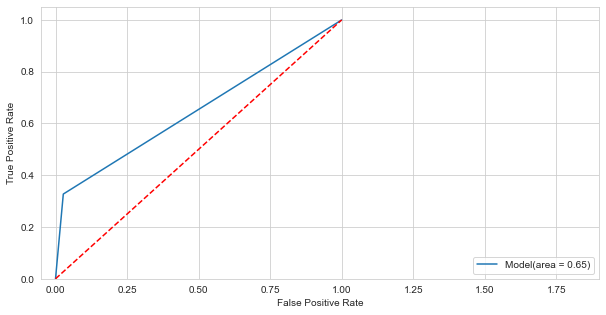

In [349]:
roc_plot(xtest,ytest,model_log)

this model is not converged bas badhe ja raha hai , acha kab hota jab wo ek step function ke graph jesa hota like increase horaha hai pehle badme it stabilises

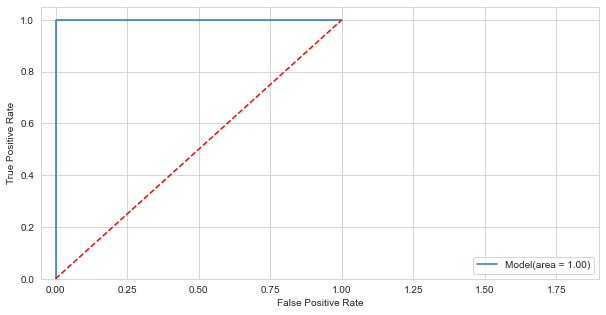

In [350]:
roc_plot(xtest,ytest,model_dt)

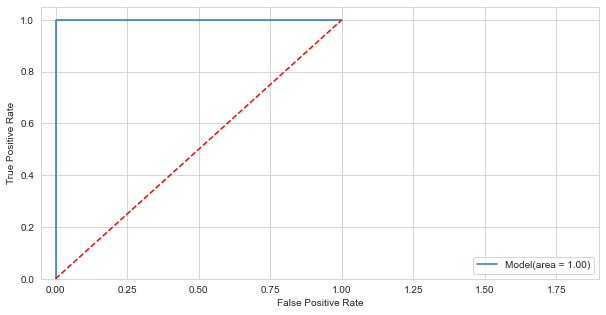

In [351]:
roc_plot(xtest,ytest,model_rf)

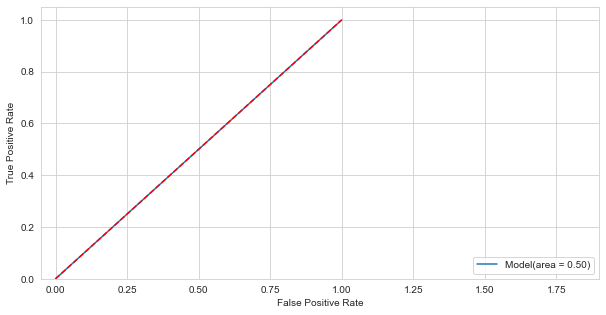

In [352]:
roc_plot(xtest,ytest,model_svc)

In [472]:
def performance(xt, yt, model):
    yp = model.predict(xt)
    print('Classification Report')
    print('-'*30)
    print('R2-Score:',model.score(xt,yt))
    print(classification_report(yt,yp))
    print('-'*30)
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(pd.DataFrame(confusion_matrix(yt,yp),index=['No','Yes'],columns=['No','Yes']),annot=True,fmt='d')
    plt.title('Confusion Matrix')
    rocAuc = roc_auc_score(yt, yp)
    fpr,tpr,th = roc_curve(yt, yp)
    plt.subplot(1,2,2)
    plt.plot(fpr,tpr, label = 'Model (area=%0.2f)'%rocAuc)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')
    plt.show()

Classification Report
------------------------------
R2-Score: 0.9464
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1137
           1       0.79      0.55      0.65       113

    accuracy                           0.95      1250
   macro avg       0.88      0.77      0.81      1250
weighted avg       0.94      0.95      0.94      1250

------------------------------


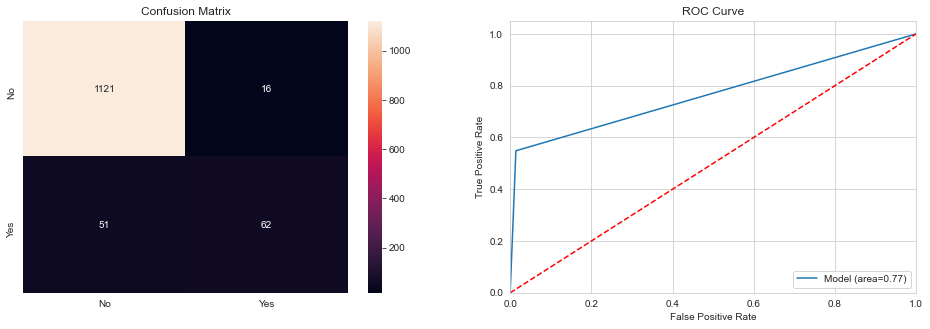

In [473]:
performance(xtest,ytest, model_log)  #biased data hai recall bahut kam hai 

Classification Report
------------------------------
R2-Score: 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1137
           1       0.88      0.90      0.89       113

    accuracy                           0.98      1250
   macro avg       0.93      0.95      0.94      1250
weighted avg       0.98      0.98      0.98      1250

------------------------------


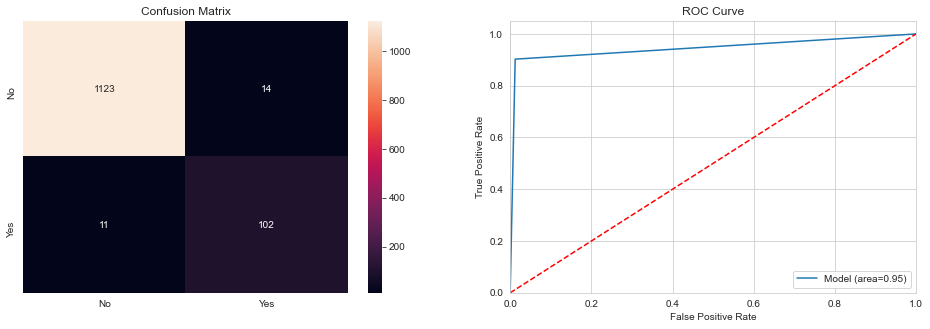

In [474]:
performance(xtest,ytest, model_dt)

In [376]:
#for class weights
# we are tuning the model with teh data , solver me best is newtonsage 
model_log = LogisticRegression().fit(xtrain,ytrain)

Classification Report
------------------------------
R2-Score: 0.9888
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1137
           1       1.00      0.88      0.93       113

    accuracy                           0.99      1250
   macro avg       0.99      0.94      0.96      1250
weighted avg       0.99      0.99      0.99      1250

------------------------------


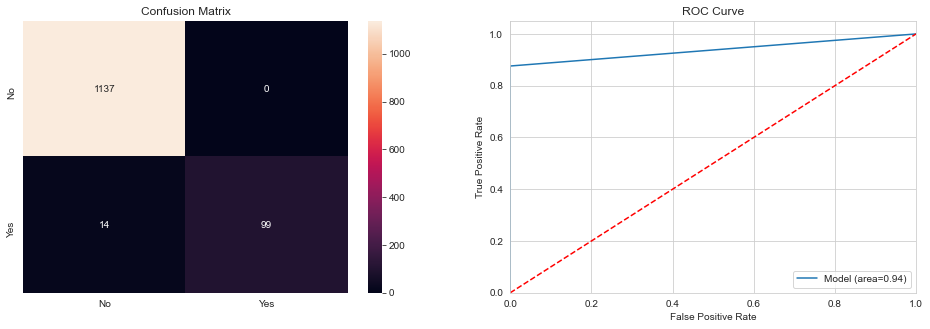

In [475]:
performance(xtest,ytest, model_rf)

Classification Report
------------------------------
R2-Score: 0.9144
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1137
           1       0.67      0.11      0.18       113

    accuracy                           0.91      1250
   macro avg       0.79      0.55      0.57      1250
weighted avg       0.90      0.91      0.89      1250

------------------------------


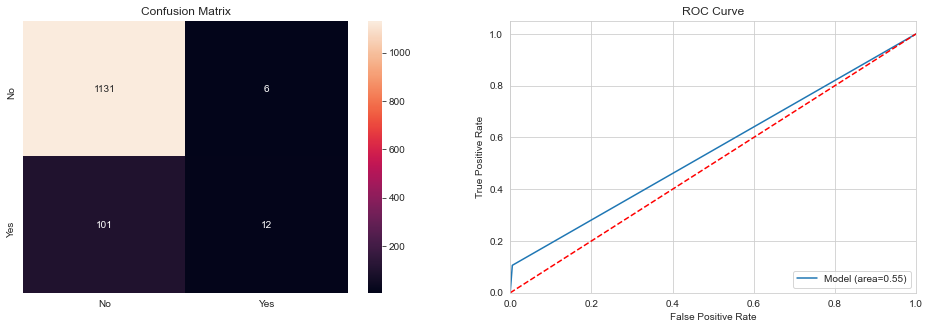

In [476]:
performance(xtest,ytest, model_svc)  #bahut bura behaviour 

# Improving the performance of the models1

In [ ]:
R2-Score:  0.9144
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1137
           1       0.54      0.33      0.41       113

    accuracy                           0.91      1250
   macro avg       0.74      0.65      0.68      1250
weighted avg       0.90      0.91      0.90      1250

Classification Report
------------------------------
R2-Score: 0.9528
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1137
           1       0.82      0.61      0.70       113

    accuracy                           0.95      1250
   macro avg       0.89      0.80      0.84      1250
weighted avg       0.95      0.95      0.95      1250

------------------------------


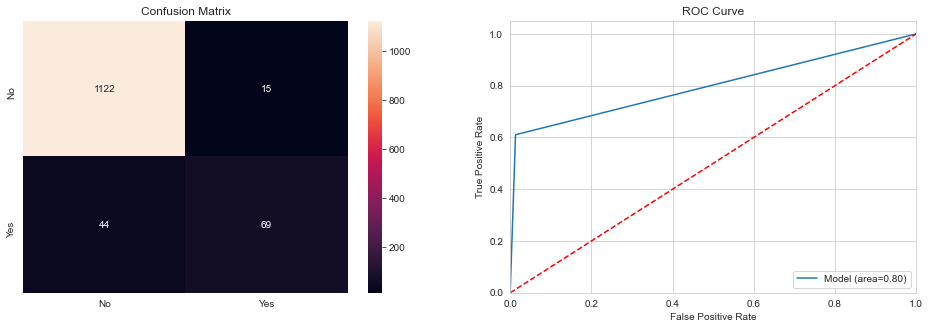

In [477]:
#class weights 
model_log1 = LogisticRegression(solver='newton-cg',random_state=101,class_weight={0:0.5, 1:0.75}).fit(xtrain,ytrain)
performance(xtest,ytest,model_log1)

In [478]:
params = {'solver':['lbfgs','newton-cg'],'class_weight':[{0:0.5, 1:0.75}, {0:0.5, 1:0.5}, {0:0.2, 1:0.8},{0:0.8, 1:0.8},{0:0.9, 1:0.1},{0:0.1, 1:0.9}] }


In [479]:
gcv_legit = GridSearchCV(LogisticRegression(),param_grid=params,verbose=3).fit(xtrain,ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.941, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.956, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.935, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.952, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.948, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.945, total=   0.3s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.959, total=   0.3s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.941, total=   0.3s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.949, total=   0.3s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   13.3s finished


In [504]:
gcv_legit.best_params_

{'class_weight': {0: 0.8, 1: 0.8}, 'solver': 'newton-cg'}

Classification Report
------------------------------
R2-Score: 0.9528
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1137
           1       0.86      0.57      0.68       113

    accuracy                           0.95      1250
   macro avg       0.91      0.78      0.83      1250
weighted avg       0.95      0.95      0.95      1250

------------------------------


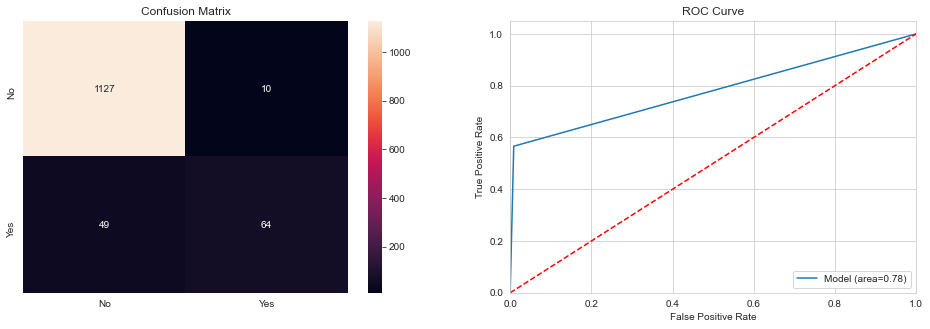

In [481]:
performance(xtest,ytest,gcv_legit.best_estimator_)

In [482]:
pd.DataFrame(gcv_legit.best_estimator_.coef_, index=['Coefficient'],columns=x.columns).T

,Coefficient
Age,-0.079742
Experience,0.089982
Income,0.051790
Family,0.685185
CCAvg,0.121470
Education,1.634057
Mortgage,0.000828
Securities_Account,-0.659308
CD_Account,3.427122
Online,-0.676103


In [393]:
#we can remove those having negative values 

###### dropping the columns which are less relevant

In [483]:
xtrain.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [484]:
xtrain1 = xtrain.drop(['Age','Experience','Family','Securities_Account','Online', 'CreditCard'],axis=1)
xtest1 = xtest.drop(['Age','Experience','Family','Securities_Account','Online', 'CreditCard'],axis=1)

In [485]:
gcv_legit1 = GridSearchCV(LogisticRegression(),param_grid=params,verbose=3).fit(xtrain1,ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.937, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.956, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.923, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.948, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=lbfgs ....................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=lbfgs, score=0.944, total=   0.1s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.937, total=   0.2s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.956, total=   0.2s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.923, total=   0.2s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_weight={0: 0.5, 1: 0.75}, solver=newton-cg, score=0.948, total=   0.2s
[CV] class_weight={0: 0.5, 1: 0.75}, solver=newton-cg ................
[CV]  class_

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    9.8s finished


Classification Report
------------------------------
R2-Score: 0.9496
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1137
           1       0.85      0.54      0.66       113

    accuracy                           0.95      1250
   macro avg       0.90      0.77      0.82      1250
weighted avg       0.95      0.95      0.94      1250

------------------------------


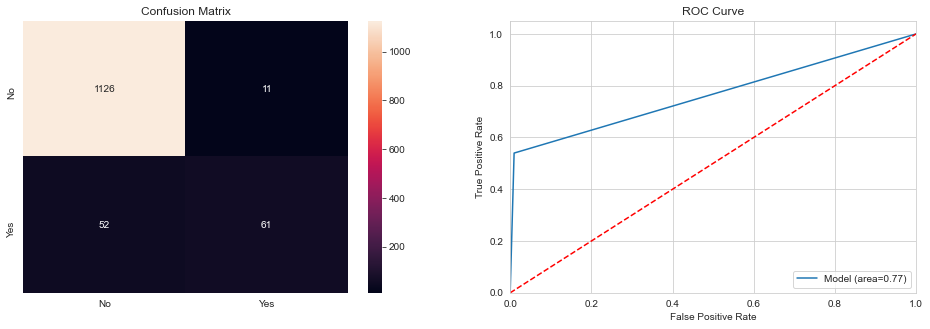

In [486]:
performance(xtest1,ytest,gcv_legit1.best_estimator_)

In [401]:
#Logistic Regression  with Statsmodel

In [487]:
xtrain_sm = sm.add_constant(xtrain)
xtest_sm  = sm.add_constant(xtest)
model_sm_Logit= sm.Logit(ytrain,xtrain_sm)
model_sm = model_sm_Logit.fit(warn_convergence=False) #training 


Optimization terminated successfully.
         Current function value: 0.126539
         Iterations 9


In [489]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3750
Model:                          Logit   Df Residuals:                     3738
Method:                           MLE   Df Model:                           11
Date:                Mon, 16 Aug 2021   Pseudo R-squ.:                  0.6050
Time:                        20:26:42   Log-Likelihood:                -474.52
converged:                       True   LL-Null:                       -1201.4
Covariance Type:            nonrobust   LLR p-value:                3.060e-305
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -11.3792      1.923     -5.918      0.000     -15.148      -7.610
Age                   -0.0787      0.072     -1.092      0.275      -0.220       0.063
Experience             0.0889      0.072      1.242      0.214      -0.051       0.229
Income                 0.0533      0.003     18.005      0.000       0.047       0.059
Family                 0.7079      0.087      8.147      0.000       0.538       0.878
CCAvg                  0.1246      0.047      2.677      0.007       0.033       0.216
Education              1.7056      0.132     12.893      0.000       1.446       1.965
Mortgage               0.0008      0.001      1.234      0.217      -0.000       0.002
Securities_Account    -1.0216      0.344     -2.968      0.003      -1.696      -0.347
CD_Account             4.1492      0.385     10.790      0.000       3.396       4.903
Online                -0.8047      0.182     -4.415      0.000      -1.162      -0.447
CreditCard            -1.1876      0.242     -4.911      0.000      -1.661      -0.714
======================================================================================
"""

In [ ]:
#i want coeff as positive only not negative 

In [493]:
xtrain_sm2 = sm.add_constant(xtrain.drop(['Age','Experience','Securities_Account','Online','CreditCard','Mortgage'],axis = 1))
xtest_sm2  = sm.add_constant(xtest.drop(['Age','Experience','Securities_Account','Online','CreditCard','Mortgage'],axis = 1))  
model_sm_Logit2= sm.Logit(ytrain,xtrain_sm2)#removing those which have negative coefficients 
model_sm2 = model_sm_Logit2.fit(warn_convergence=False)

#let me try ki scale kar ke data de --- like after normalissing it 

Optimization terminated successfully.
         Current function value: 0.133477
         Iterations 9


In [494]:
model_sm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3750
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            5
Date:                Mon, 16 Aug 2021   Pseudo R-squ.:                  0.5834
Time:                        20:34:22   Log-Likelihood:                -500.54
converged:                       True   LL-Null:                       -1201.4
Covariance Type:            nonrobust   LLR p-value:                5.908e-301
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.6634      0.625    -21.876      0.000     -14.888     -12.439
Income         0.0536      0.003     18.887      0.000       0.048       0.059
Family         0.7086      0.084      8.403      0.000       0.543       0.874
CCAvg          0.1063      0.045      2.378      0.017       0.019       0.194
Education      1.6511      0.126     13.153      0.000       1.405       1.897
CD_Account     2.6965      0.264     10.212      0.000       2.179       3.214
==============================================================================
"""

In [495]:
#now the coefficents are positive only that means in control

In [501]:
ypred_sm = model_sm2.predict(xtest_sm2) >0.1

In [502]:
from sklearn.metrics import accuracy_score

In [503]:
accuracy_score(ytest,ypred_sm)

0.892

In [505]:
print(classification_report(ytest,ypred_sm))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1137
           1       0.45      0.88      0.60       113

    accuracy                           0.89      1250
   macro avg       0.72      0.89      0.77      1250
weighted avg       0.94      0.89      0.91      1250



In [499]:
ytest #what it returned me instead of 0 and 1 so keeping a threshhold

1718    0
2511    1
345     0
2521    0
54      0
       ..
1881    0
2800    0
1216    0
1648    0
3063    0
Name: Personal_Loan, Length: 1250, dtype: int64

In [506]:
from sklearn.preprocessing import StandardScaler

In [519]:
xtrain_sc = pd.DataFrame(StandardScaler().fit_transform(xtrain),columns = x.columns,index = xtrain.index)
xtest_sc = pd.DataFrame(StandardScaler().fit_transform(xtest),columns = x.columns,index = xtest.index)

In [520]:
xtrain_sc.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
3430,1.627245,1.561018,-0.903070,-0.352058,-0.934134,-1.057589,-0.550755,-0.334813,-0.255619,0.824230,1.524621
3979,-0.635267,-0.527176,0.352228,-0.352058,-1.104899,-1.057589,2.001882,2.986743,3.912077,0.824230,1.524621
2153,-0.461227,-0.527176,1.066449,-1.218911,1.855038,-1.057589,-0.550755,-0.334813,-0.255619,0.824230,-0.655901
4764,0.931087,1.038969,0.308942,1.381648,-0.535680,0.128403,-0.550755,-0.334813,-0.255619,0.824230,1.524621
36,1.192146,1.299993,1.023163,-1.218911,0.545835,-1.057589,-0.550755,-0.334813,-0.255619,-1.213254,1.524621


In [521]:
xtest_sc.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
1718,-0.479498,-0.372521,-1.207042,1.446620,-0.889074,0.182455,-0.569830,-0.360831,-0.247226,0.815136,1.629408
2511,0.487800,0.593560,0.397366,1.446620,0.623241,-1.024259,-0.569830,-0.360831,4.044887,0.815136,1.629408
345,0.487800,0.593560,-1.360890,1.446620,-0.830908,0.182455,0.183535,2.771382,-0.247226,0.815136,-0.613720
2521,0.311927,0.242258,-0.987260,1.446620,-0.074750,-1.024259,-0.569830,-0.360831,-0.247226,0.815136,1.629408
54,-1.446796,-1.338602,-0.657588,-1.211305,-1.005406,1.389169,-0.569830,-0.360831,-0.247226,0.815136,-0.613720


In [522]:
xtrain_sm3 = sm.add_constant(xtrain_sc.drop(['Age','Experience','Securities_Account','Online','CreditCard','Mortgage'],axis = 1))
xtest_sm3 = sm.add_constant(xtest_sc.drop(['Age','Experience','Securities_Account','Online','CreditCard','Mortgage'],axis = 1))  



In [523]:
xtrain_sm3

,const,Income,Family,CCAvg,Education,CD_Account
3430,1.0,-0.903070,-0.352058,-0.934134,-1.057589,-0.255619
3979,1.0,0.352228,-0.352058,-1.104899,-1.057589,3.912077
2153,1.0,1.066449,-1.218911,1.855038,-1.057589,-0.255619
4764,1.0,0.308942,1.381648,-0.535680,0.128403,-0.255619
36,1.0,1.023163,-1.218911,0.545835,-1.057589,-0.255619
...,...,...,...,...,...,...
4171,1.0,-0.535138,1.381648,0.318148,0.128403,-0.255619
599,1.0,0.633588,-0.352058,0.318148,-1.057589,-0.255619
1361,1.0,-0.773212,1.381648,-0.592602,0.128403,-0.255619
1547,1.0,-0.470209,-1.218911,-0.421837,0.128403,-0.255619


In [524]:
xtest_sm3

,const,Income,Family,CCAvg,Education,CD_Account
1718,1.0,-1.207042,1.446620,-0.889074,0.182455,-0.247226
2511,1.0,0.397366,1.446620,0.623241,-1.024259,4.044887
345,1.0,-1.360890,1.446620,-0.830908,0.182455,-0.247226
2521,1.0,-0.987260,1.446620,-0.074750,-1.024259,-0.247226
54,1.0,-0.657588,-1.211305,-1.005406,1.389169,-0.247226
...,...,...,...,...,...,...
1881,1.0,0.177584,0.560645,0.431294,0.182455,-0.247226
2800,1.0,-1.009239,-0.325330,-0.714576,0.182455,-0.247226
1216,1.0,0.221540,-1.211305,-0.365580,1.389169,-0.247226
1648,1.0,0.243518,-0.325330,-0.132916,0.182455,-0.247226


In [525]:
ytrain

3430    0
3979    0
2153    0
4764    0
36      0
       ..
4171    0
599     0
1361    0
1547    0
4959    0
Name: Personal_Loan, Length: 3750, dtype: int64

In [526]:
model_sm_Logit3= sm.Logit(ytrain,xtrain_sm3)#removing those which have negative coefficients 
model_sm3 = model_sm_Logit3.fit(warn_convergence=False)

Optimization terminated successfully.
         Current function value: 0.133477
         Iterations 9


In [528]:
model_sm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Personal_Loan   No. Observations:                 3750
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            5
Date:                Mon, 16 Aug 2021   Pseudo R-squ.:                  0.5834
Time:                        20:49:56   Log-Likelihood:                -500.54
converged:                       True   LL-Null:                       -1201.4
Covariance Type:            nonrobust   LLR p-value:                5.908e-301
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5136      0.175    -25.825      0.000      -4.856      -4.171
Income         2.4751      0.131     18.887      0.000       2.218       2.732
Family         0.8175      0.097      8.403      0.000       0.627       1.008
CCAvg          0.1868      0.079      2.378      0.017       0.033       0.341
Education      1.3922      0.106     13.153      0.000       1.185       1.600
CD_Account     0.6470      0.063     10.212      0.000       0.523       0.771
==============================================================================
"""

In [531]:
ypred_sm3 = model_sm3.predict(xtest_sm3)>0.5

In [532]:
accuracy_score(ytest,ypred_sm3)*100

94.64

In [533]:
print(classification_report(ytest,ypred_sm3))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1137
           1       0.79      0.56      0.65       113

    accuracy                           0.95      1250
   macro avg       0.87      0.77      0.81      1250
weighted avg       0.94      0.95      0.94      1250



In [ ]:
#Logistic regression have not developed our model into something very good 

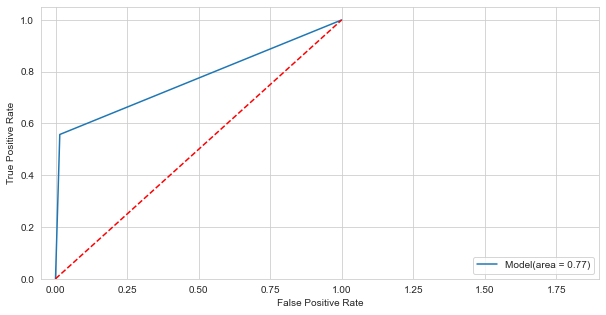

In [534]:
rocAuc = roc_auc_score(ytest, ypred_sm3) #actual labels or predicted labele ke bich me comparison ,jese true positive and all 
fpr,trp,th = roc_curve(ytest, ypred_sm3)
plt.figure(figsize=(10,5))
plt.plot(fpr,trp,label = 'Model(area = %0.2f)'%rocAuc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05,1.9])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
    
plt.show()
    

##### i want to see that tree 
improving decision Tress

In [536]:
from sklearn import tree

In [564]:
def build_tree(model,size=(30,30)):
    plt.figure(figsize=(30,30))
    out = tree.plot_tree(model,feature_names=x.columns,filled=True,fontsize = 9, node_ids= True, class_names = True,)
    for p in out:
        arrow = p.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor('black')
            arrow.set_linewidth(1)
    plt.show()
    

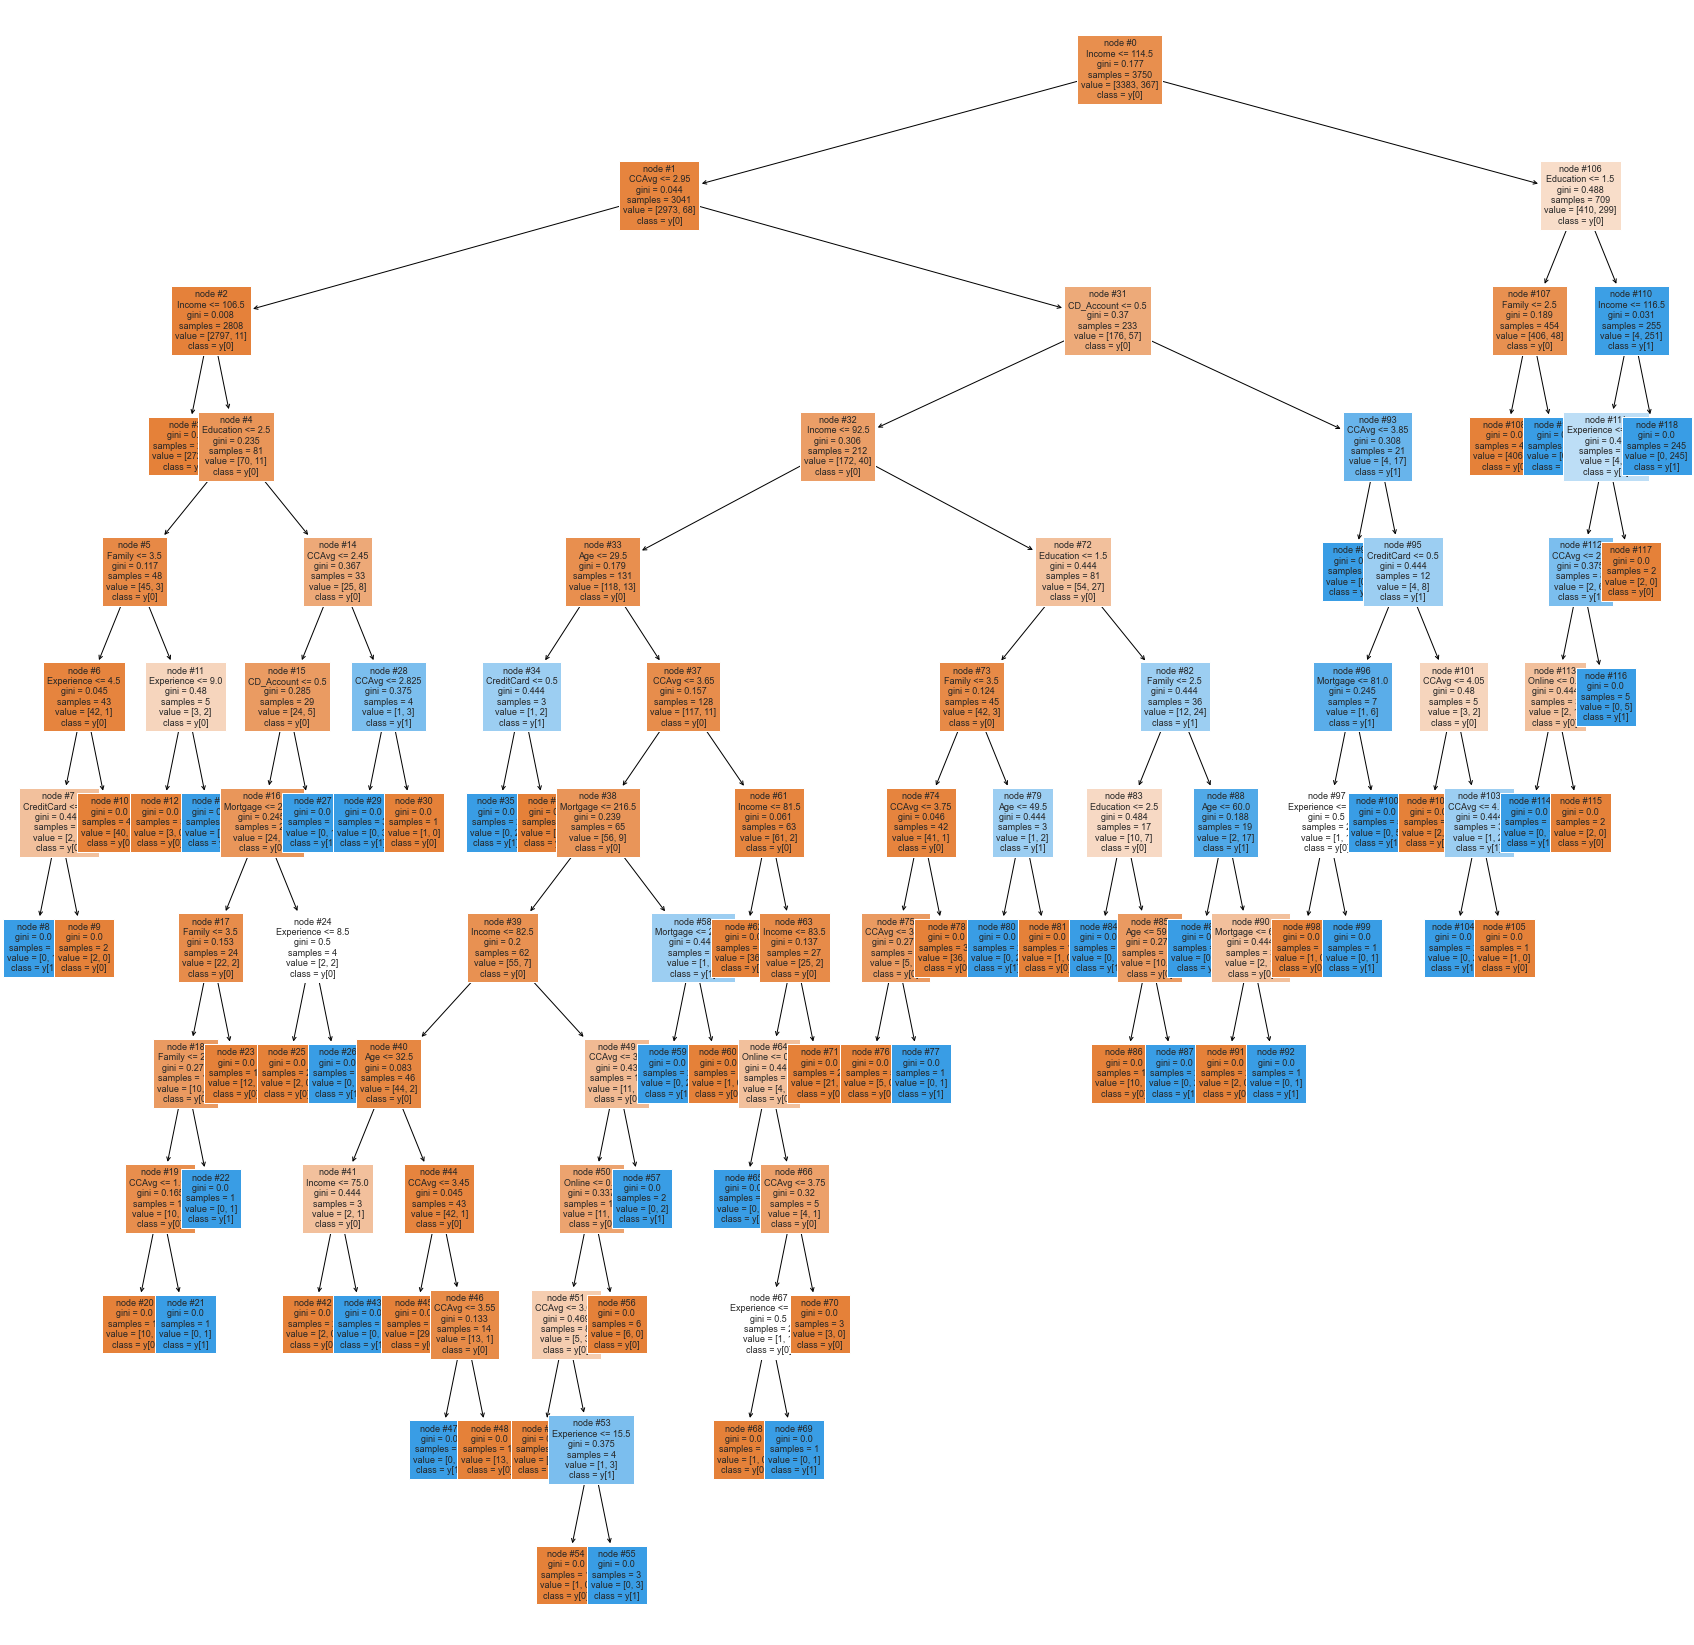

In [565]:
build_tree(model_dt)

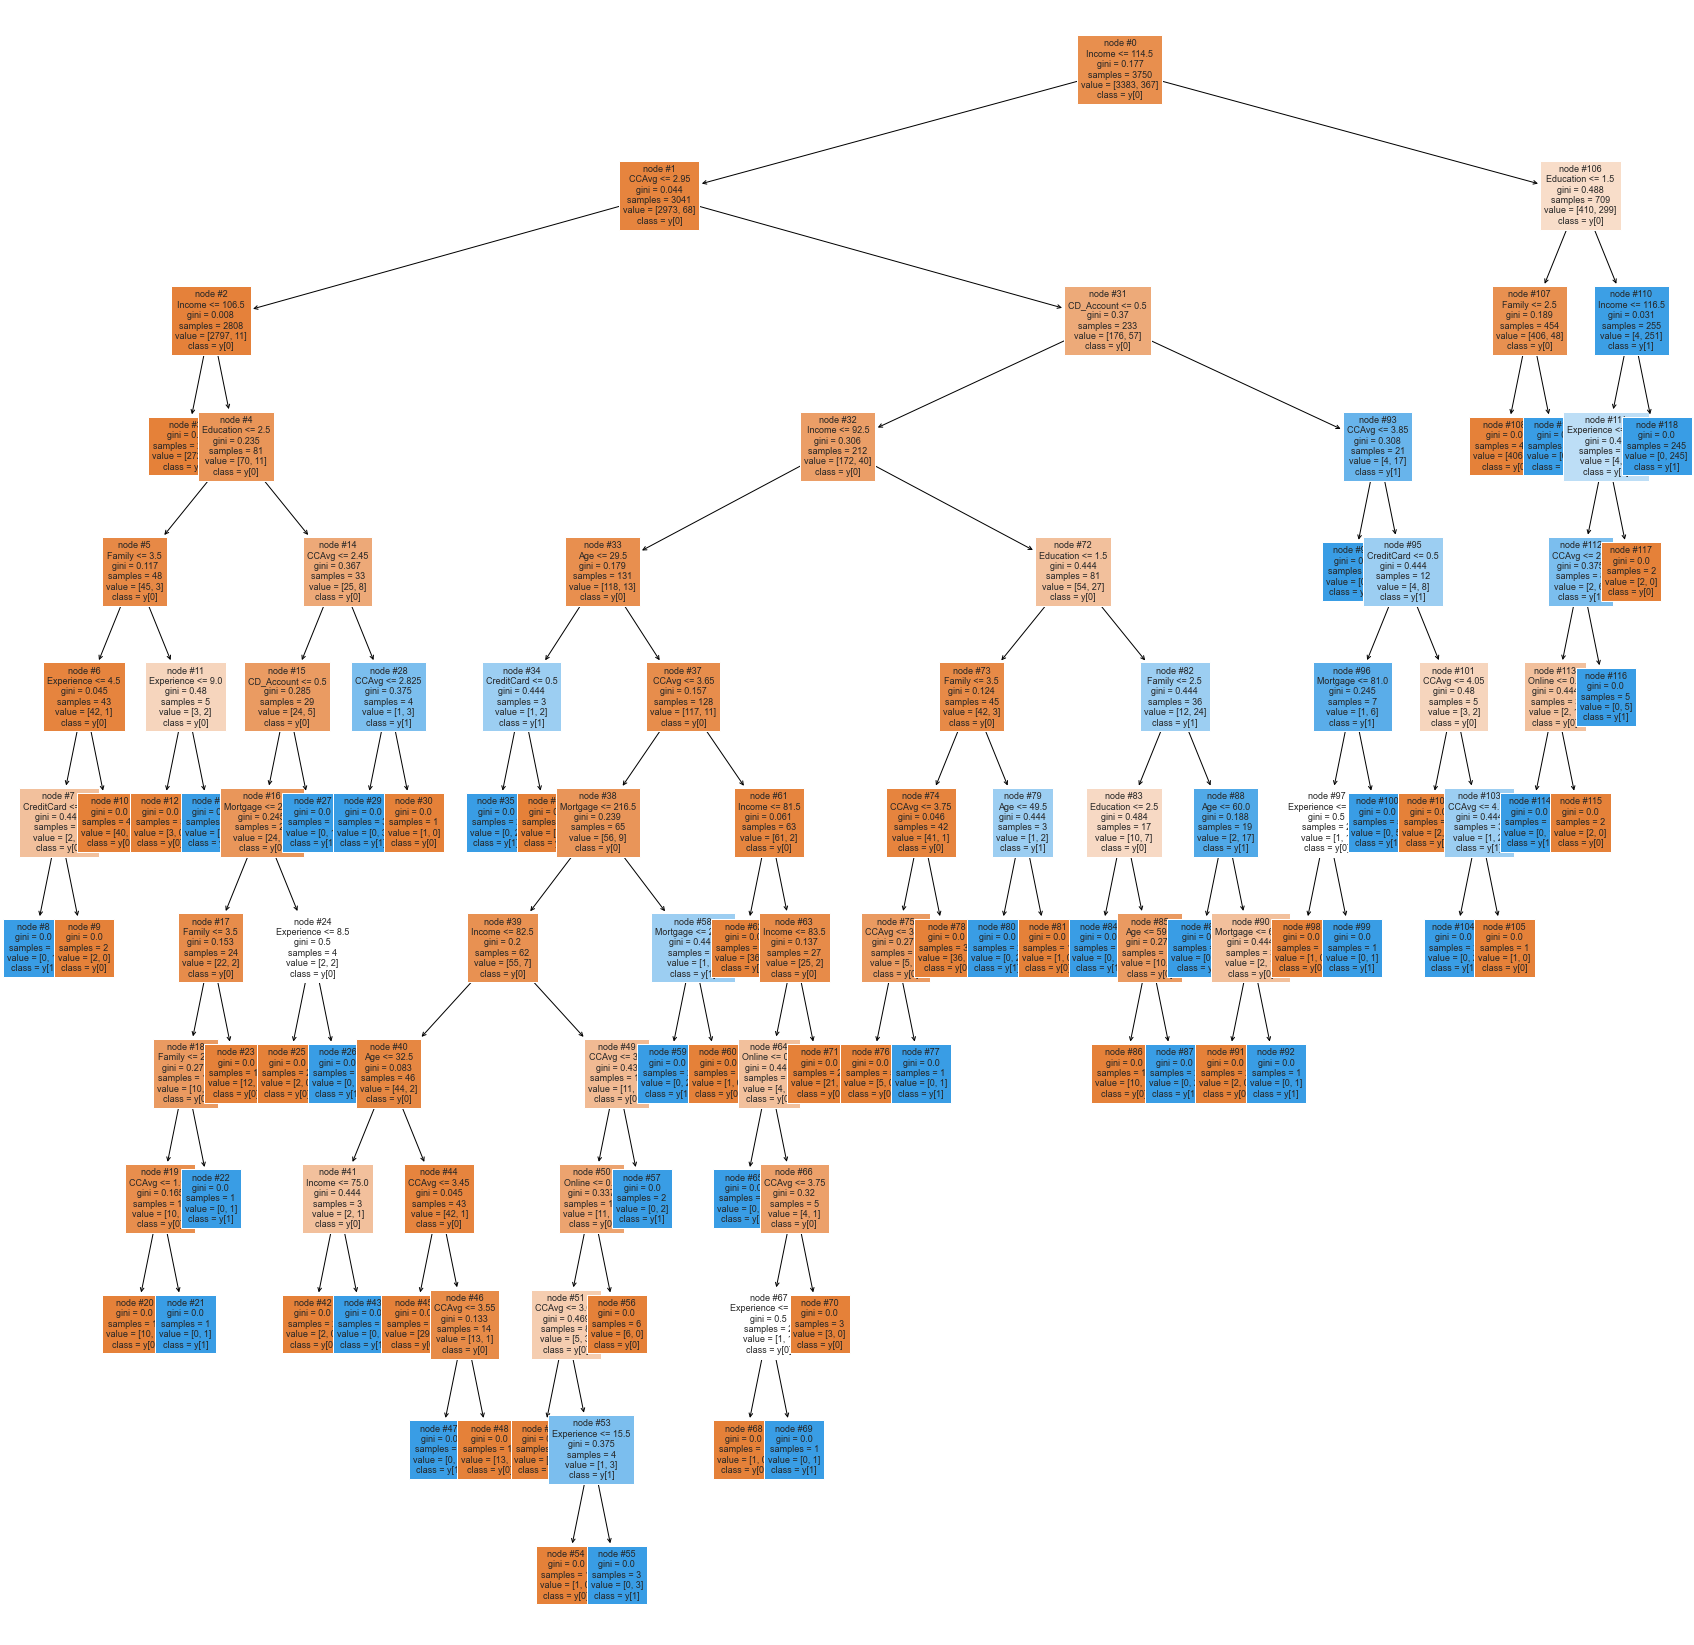

In [539]:
#Build the tree
plt.figure(figsize=(30,30))
out = tree.plot_tree(model_dt,feature_names=x.columns,filled=True,fontsize = 9, node_ids= True, class_names = True,)
for p in out:
    arrow = p.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [541]:
#last ones are my leafs 
#no of samples are quite less 
#these actually leads into overfitting 
#for each case it created one conditions 
#it like we are working on exact situations 
#so what to do next 
#but then we can't rely on this 
#we have one more thing in decision tree 
#that is feature importance 


In [558]:
def show_important(model):
    importances = model.feature_importances_
    idx = np.argsort(importances)
    plt.figure(figsize = (12,12))
    plt.title('Feature Importance')
    plt.barh(range(len(idx)),importances[idx],color = 'purple',align = 'center')
    plt.yticks(range(len(idx)),[x.columns[i]  for i in idx])
    plt.xlabel('Importance')
    

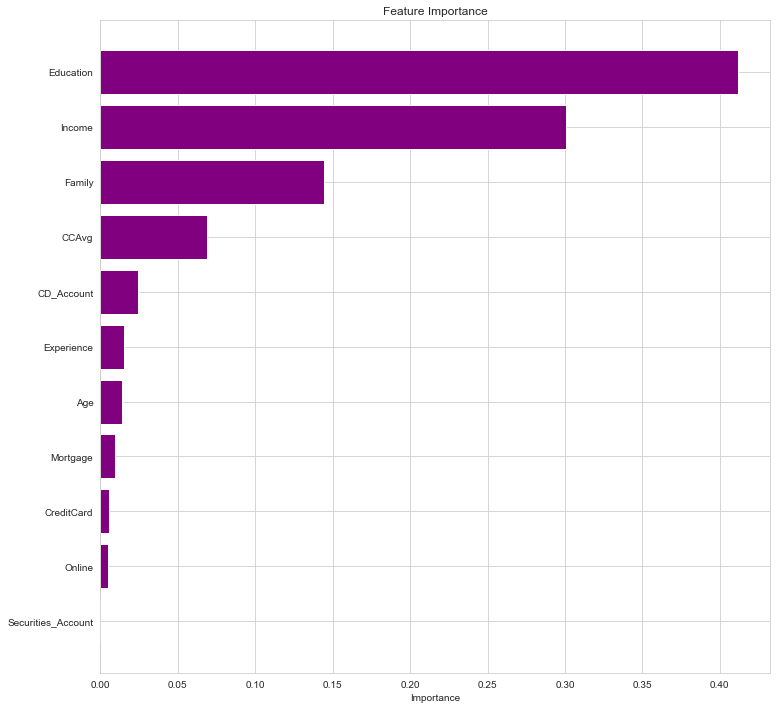

In [559]:
show_important(model_dt)

Text(0.5, 0, 'Importance')

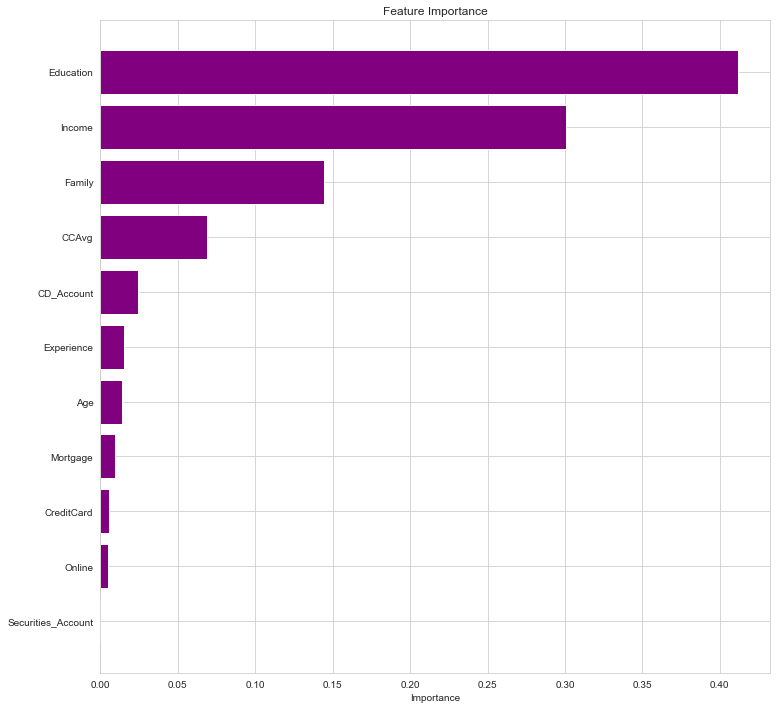

In [548]:

importances = model_dt.feature_importances_
idx = np.argsort(importances)
plt.figure(figsize = (12,12))
plt.title('Feature Importance')
plt.barh(range(len(idx)),importances[idx],color = 'purple',align = 'center')
plt.yticks(range(len(idx)),[x.columns[i]  for i in idx])
plt.xlabel('Importance')

In [550]:
params = {'criterion':['gini','entropy'],
         'min_samples_leaf':[1,2,5,7,11,15,20,25],
         'max_depth':np.arange(1,10),
         'max_leaf_nodes':[5,10,15,20,25,30,35]}

In [549]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [551]:
model_grid_dt_1 = GridSearchCV(DecisionTreeClassifier(),param_grid=params,).fit(xtrain,ytrain)

In [552]:
model_grid_dt_1.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 11}

Classification Report
------------------------------
R2-Score: 0.9816
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1137
           1       0.94      0.85      0.89       113

    accuracy                           0.98      1250
   macro avg       0.96      0.92      0.94      1250
weighted avg       0.98      0.98      0.98      1250

------------------------------


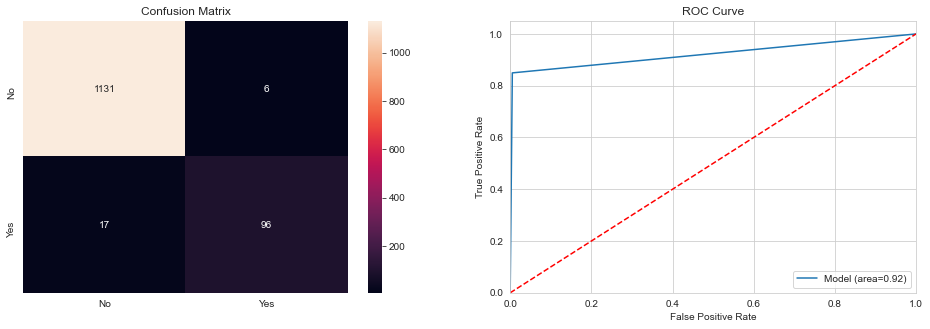

In [553]:
performance(xtest,ytest,model_grid_dt_1.best_estimator_)

#### still giving 0.98 this percentage 
recall and precision increased
#my depth is reduced and that is really good 

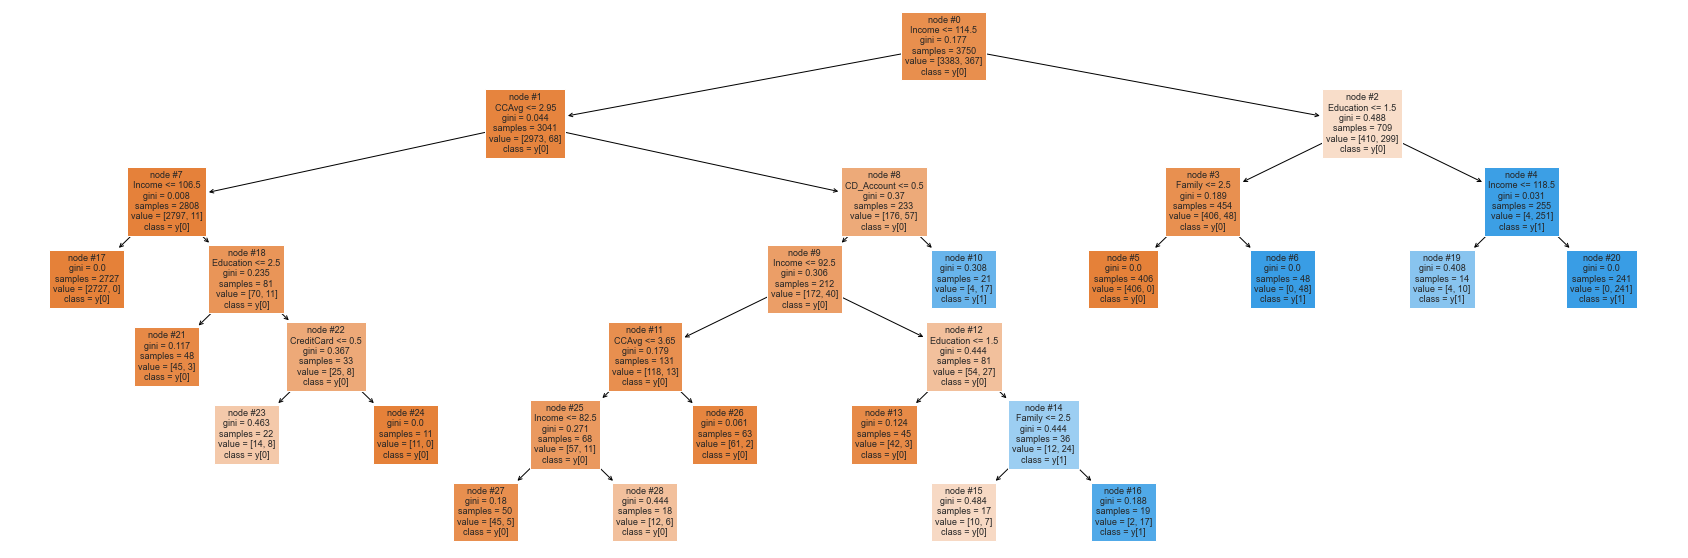

In [557]:
plt.figure(figsize=(30,10))
out = tree.plot_tree(model_grid_dt_1.best_estimator_,feature_names=x.columns,filled=True,fontsize = 9, node_ids= True, class_names = True,)
for p in out:
    arrow = p.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

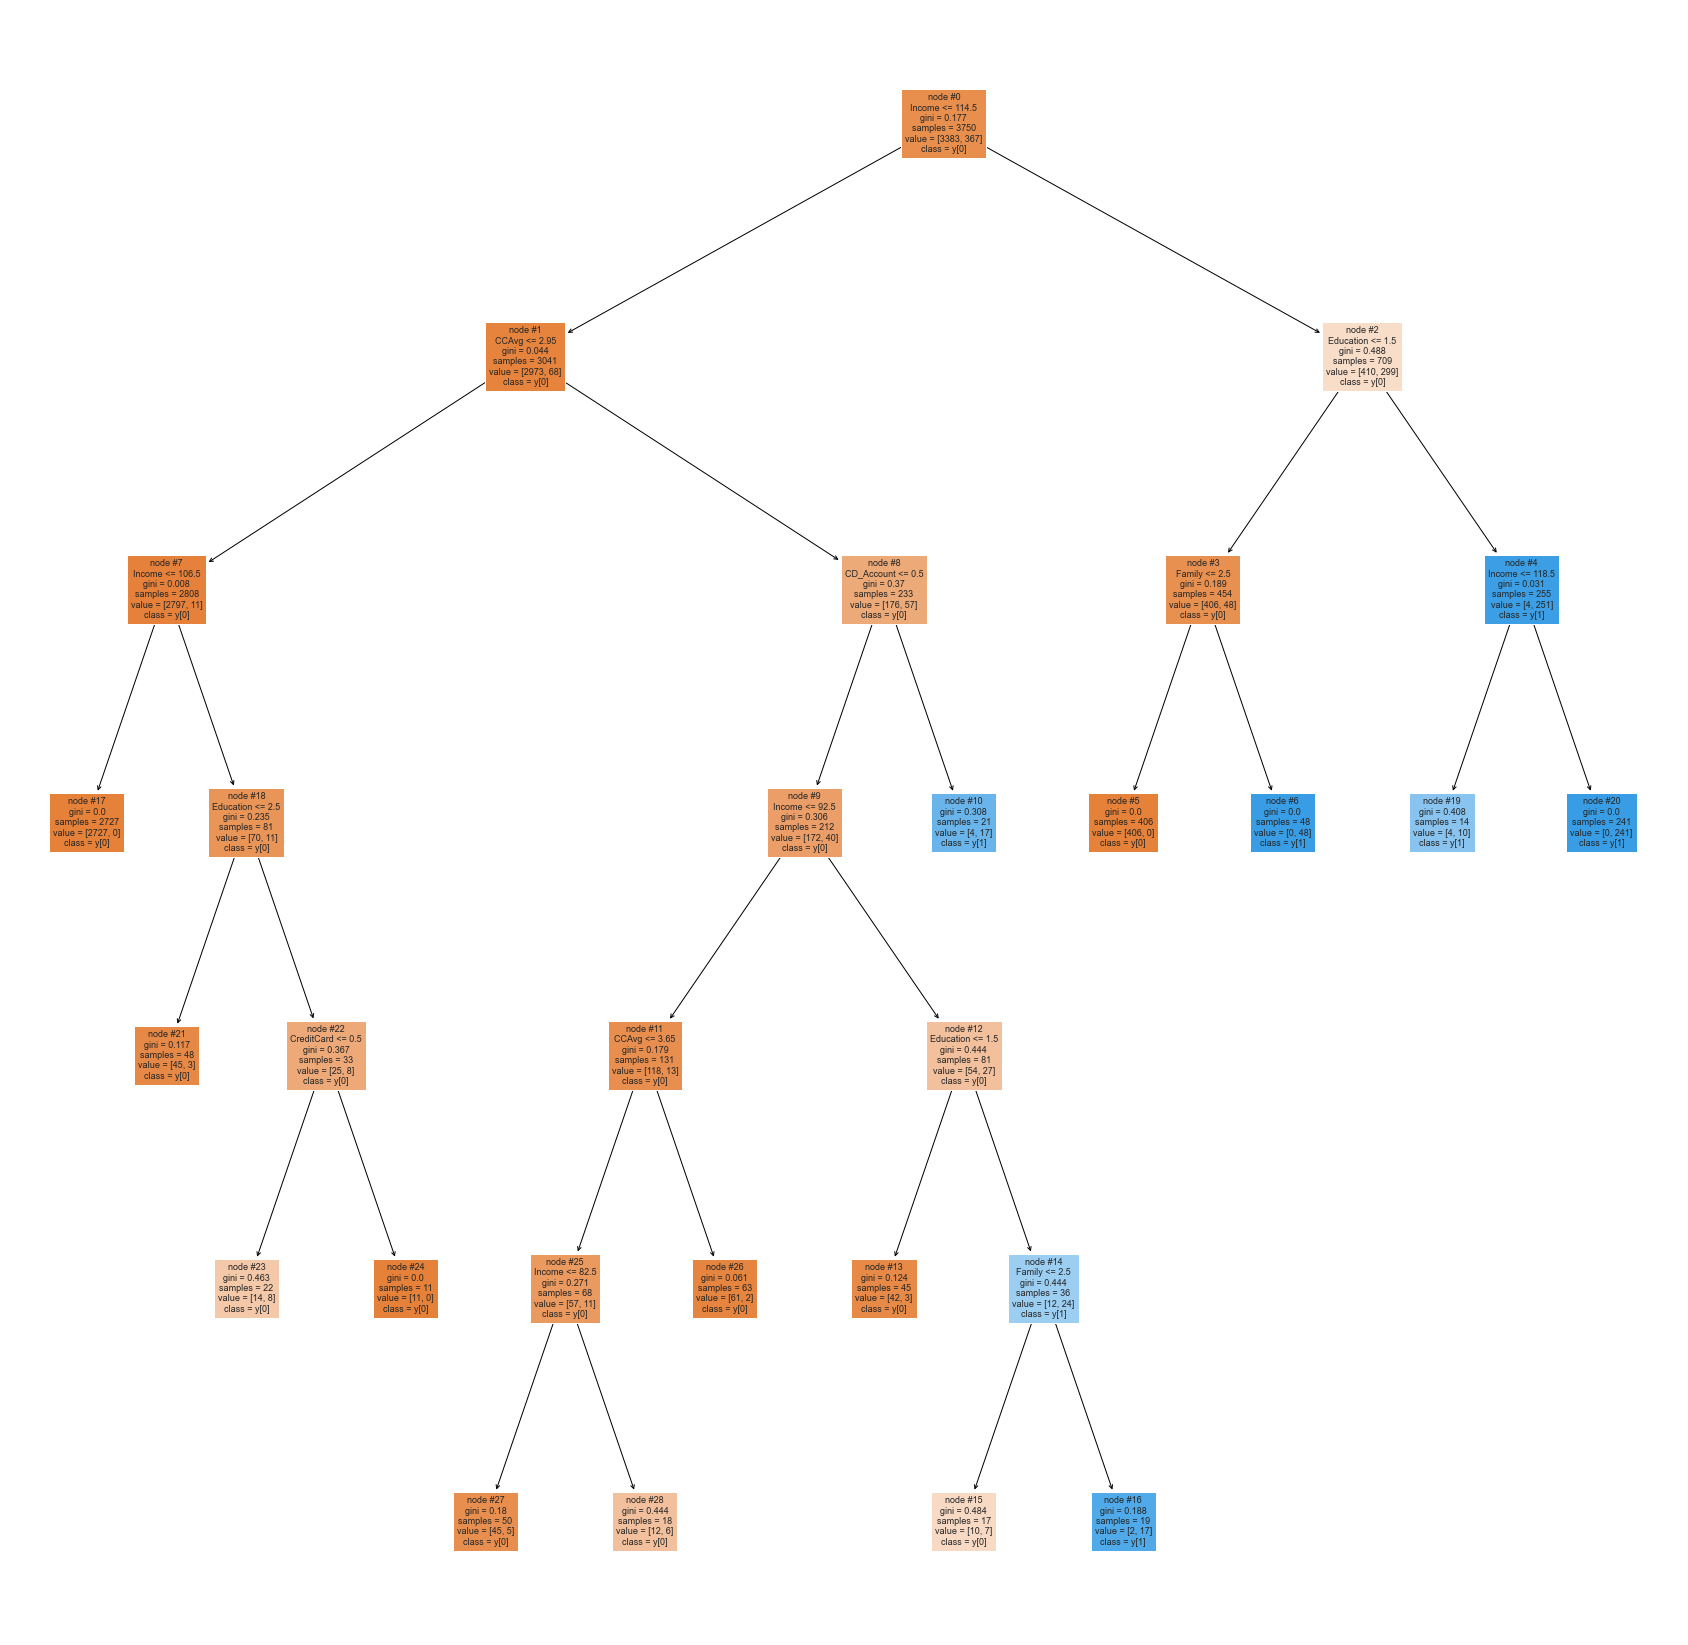

In [569]:
build_tree(model_grid_dt_1.best_estimator_,(30,16))

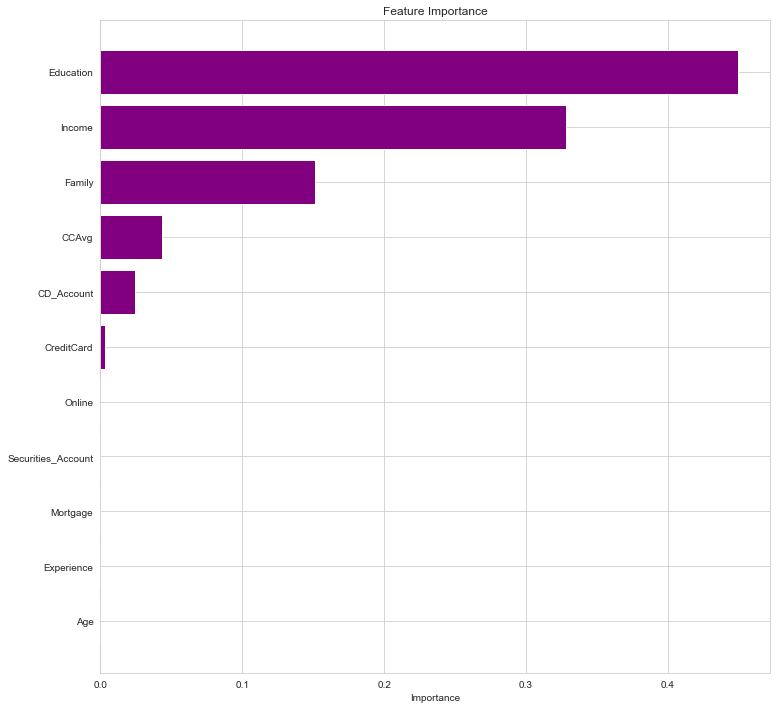

In [570]:
show_important(model_grid_dt_1.best_estimator_)

##### so we can see that online , security account ,mortgage, experience,age  are all not important for our model as model is not depending in these parameters 

### IMPROVING / VISUALIZING RANDOM FOREST 

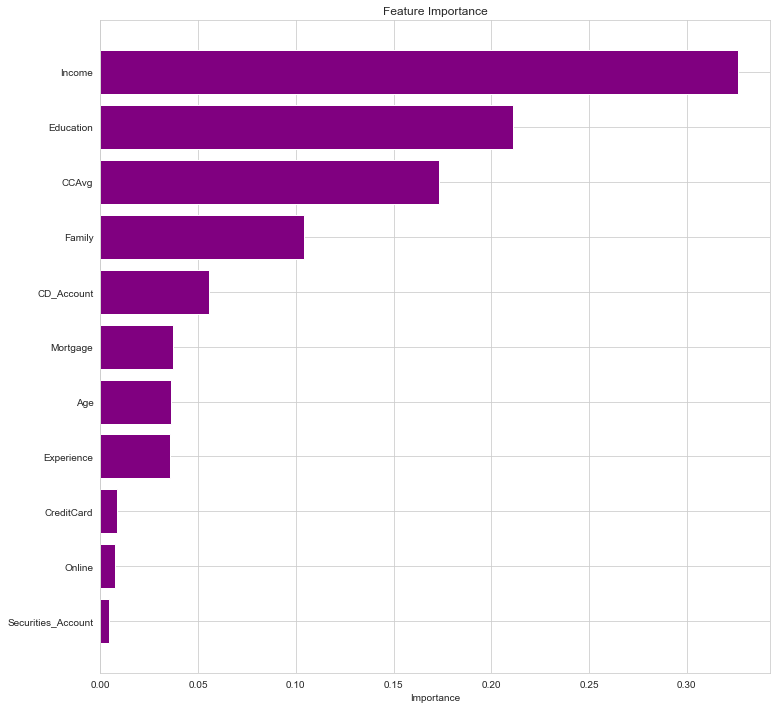

In [572]:
show_important(model_rf)

In [579]:
params_rf = {'n_estimators':np.arange(2,151,88),
    'criterion':['gini','entropy'],
         'min_samples_leaf':[1,2,5,15],
         'max_depth':np.arange(1,10),
         'max_leaf_nodes':[5,15,25,35]}

In [580]:
model_grid_rf_1 = GridSearchCV(RandomForestClassifier(),param_grid=params_rf,verbose= 3).fit(xtrain,ytrain)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=2 
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=2, score=0.903, total=   0.0s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=2 
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=2, score=0.903, total=   0.0s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=2 
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=2, score=0.903, total=   0.0s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=2 
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=2, score=0.901, total=   0.0s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=2 
[CV]  criterion=gini, max_depth=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=90, score=0.903, total=   0.2s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=90 
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=90, score=0.903, total=   0.3s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=90 
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=90, score=0.903, total=   0.4s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=90 
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=90, score=0.901, total=   0.5s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=90 
[CV]  criterion=gini, max_depth=1, max_leaf_nodes=5, min_samples_leaf=1, n_estimators=90, score=0.901, total=   0.5s
[CV] criterion=gini, max_depth=1, max_leaf_nodes=5, min_sam

KeyboardInterrupt: 

In [ ]:
#n estimators are the no of trees

In [ ]:
performance(xtest,ytest,model_rf_1.best_estimator_)

In [ ]:
show_important(model_grid_rf_1.best_estimator_)

In [ ]:
params_svc = {'C':[1000,100,10,1,0.1,0.01.0.001,0.0001],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['linear','rbf']}

In [ ]:
model_grid_svc_1 = GridSearchCV(SVC(),param_grid=params_svc,verbose = 3).fit(xtrain,ytrain)

In [ ]:
perfomance(xtest,ytest,model_grid_svc_1.best_estimator_)